# Primjer prvog kolokvija

Prvi kolokvij će biti ovog tipa. Pisati će se u obliku jupyter bilježnice gdje će te nadopuniti ili napisati kod, kratko odgovoriti na pitanja i slično. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### 1. zadatak
Napisati numpy funkciju koja će izračunati prosjek značajki matrice dizajna (redci predstavljaju primjere/podatke a stupci njihove značajke) za svaki podatak. Znači ulaz je matrica dimenzija $N \times n$, a izlaz vektor dimenzije $N$

In [12]:
def avg(design_matrix):
    return np.mean(design_matrix, axis=1)





print(avg(np.array([[0,2], [1,5]])))

[1. 3.]


### 2. zadatak

Napisati funkciju koja prima dvije matrice iste dimenzije. Funkcija vraća sve elemente prve matrice (u obliku 1-d arraya ili liste), ako je element druge matrice na istoj poziciji paran

In [16]:
def pick(m1, m2):
    return m1[m2 % 2 == 0]




print(
    pick(
        np.array([[1,2],[3,4]]),
        np.array([[1,2],[2,1]])
    )
)

[2 3]


### 3. zadatak
Napisati funkciju koja provjerava jesu li retci matrice dimenzije $N \times 3$ duljine stranice trokuta. Tri broja mogu biti duljine stranice trokuta ako i samo ako je najveća duljina manja ili jednaka zbroju manjih duljina. Funkcija vraća true ako su svi elementi trokuti, inače false.

In [20]:
def check(design_matrix):
    largest = np.max(design_matrix, axis=1)  # stvaram dimenzije N -> i-ti element je najveći element i-tog "trokuta"
    sum_of_all = np.sum(design_matrix, axis=1) # stvaram array dimentije N -> i-ti element je suma elemenata i-tog "trokuta"
    sum_minus_2_largest = sum_of_all - largest * 2  # suma_svih - najveća = suma_dvije_najmanje
                                                    # suma_dvije_najmanje > najveće -> suma_dvije_najmanje - najveće > 0
                                                    # (suma_svih - najveća) - najveća > 0
                                                    # suma_svih - 2 * najveća > 0

    print(np.product(sum_minus_2_largest >= 0)) # true -> 1, false -> 0

    if np.min(sum_minus_2_largest) < 0:
        return False
    
    return True

print(
    check(
        np.array(
            [[2,3,2],
            [1,1,2]]
        )
    )
)

0
False


/tmp/ipykernel_6104/1918471326.py:17: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  check(


### 4. zadatak

Pomoću zadane funkcije `generate_data` stvorite 10 točaka i providete dva alogirtama linearne regresije. Prvi neka koristi stupanj preslikavanja dva, a drugi pet. Zatim generirajte još pet testnih točaka te objasnite koji algoritam bolje radi i zašto. Što bi se dogodilo kada bi generirali 100 točaka za učenje? Nacrtajte hipoteze i točke.

In [33]:
def generetate_data(N=10):
    X = np.random.uniform(-2,2,size=N)
    y = -X ** 2 - X + np.random.normal(0, 1, size=N)

    return X, y 

d=2 greška train: 0.4370032151021146
d=5 greška train: 0.1563214886410767
d=2 greška test: 2.239030756314149
d=5 greška test: 136.34004458966723


[]

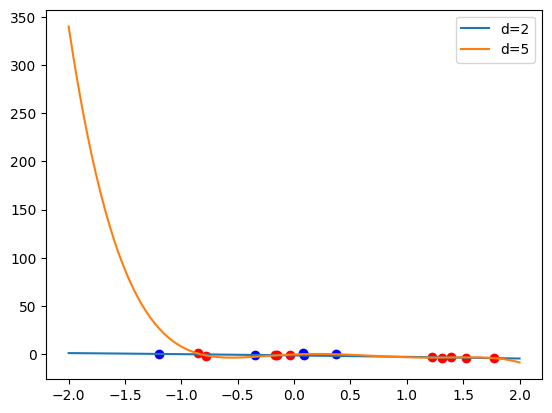

In [35]:
N = 10
X, y = generetate_data(N)

poly_1 = PolynomialFeatures(degree=2, include_bias=False)
poly_2 = PolynomialFeatures(degree=5, include_bias=False)

model_1 = LinearRegression()
model_2 = LinearRegression()

dm_1 = poly_1.fit_transform(X.reshape(-1,1))
dm_2 = poly_2.fit_transform(X.reshape(-1,1))

model_1.fit(dm_1, y)
model_2.fit(dm_2, y)

y_p_1 = model_1.predict(dm_1)
y_p_2 = model_2.predict(dm_2)

print(f'd=2 greška train: {np.sum((y_p_1 - y)**2)/N}')
print(f'd=5 greška train: {np.sum((y_p_2 - y)**2)/N}')

N = 5
X_test, y_test = generetate_data(N)

dm_1_t = poly_1.transform(X_test.reshape(-1,1))
dm_2_t = poly_2.transform(X_test.reshape(-1,1))

y_p_t_1 = model_1.predict(dm_1_t)
y_p_t_2 = model_2.predict(dm_2_t)

print(f'd=2 greška test: {np.sum((y_p_t_1 - y_test)**2)/N}')
print(f'd=5 greška test: {np.sum((y_p_t_2 - y_test)**2)/N}')

plt.scatter(X, y, c='red')
plt.scatter(X_test, y_test, c='blue')

ls = np.linspace(-2, 2, 100).reshape(-1,1)

plt.plot(
    ls,
    model_1.predict(poly_1.transform(ls)),
    label='d=2'
)
plt.plot(
    ls,
    model_2.predict(poly_2.transform(ls)),
    label='d=5'
)
plt.legend()
plt.ylim(10)
plt.plot()

#### prostor za odgovore:

### 5. zadatak
Pomoću funkcije `generate_data_2` stvorite 30 točaka, za treniranje i 10 za testiranje, te provedite algoritam unakrsne provjere za polinomne transformacije stupnjeva od 1 do 10. Iscrtajte pogreške na skupu za testiranje i na skupu za treniranje te kratko komentirajte rezultat

In [ ]:
def generetate_data_2(N=10):
    X = np.random.uniform(-2,2,size=N)
    y = -X ** 4 - X**2 + X + np.random.normal(0, 2, size=N)

    return X, y 

#### prostor za odgovore: